In [1]:
import pandas as pd
from matplotlib import pyplot as plt 
import numpy as np
%matplotlib inline

In [2]:
df=pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')
df.sample(5)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
6779,6780,15587066,Kovaleva,535,France,Male,38,2,119272.29,1,0,0,195896.59,1
454,455,15726631,Hilton,758,France,Female,39,6,127357.76,1,0,1,56577.00,0
4363,4364,15637110,McCulloch,634,Spain,Female,35,10,0.00,1,1,0,82634.41,0
9885,9886,15574584,Fang,670,France,Male,33,8,126679.69,1,1,1,39451.09,0
4989,4990,15602851,Ozioma,629,France,Male,40,9,0.00,1,1,0,106.67,0


In [3]:
df.drop('RowNumber',axis='columns',inplace=True)

In [5]:
df.drop('CustomerId',axis='columns',inplace=True)

In [6]:
df.drop('Surname',axis='columns',inplace=True)

In [7]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [8]:
df.shape

(10000, 11)

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


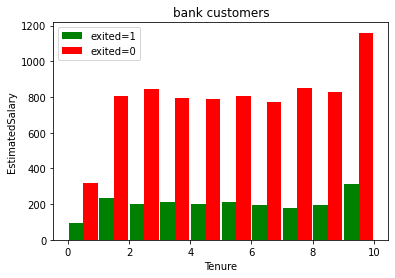

In [9]:
tenure_exited_yes=df[df.Exited==1].Tenure
tenure_exited_no=df[df.Exited==0].Tenure

plt.xlabel("Tenure")
plt.ylabel("EstimatedSalary")
plt.title("bank customers")

plt.hist([tenure_exited_yes,tenure_exited_no], rwidth=0.95, color=['green','red'],label=['exited=1','exited=0'])
plt.legend()

In [10]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [11]:
df['Gender'].replace({'Female':1,'Male':0},inplace=True)

In [12]:
df.Gender.unique()

array([1, 0])

In [13]:
df1=pd.get_dummies(data=df, columns=['Geography'])
df1.columns

Index(['CreditScore', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Geography_France', 'Geography_Germany', 'Geography_Spain'],
      dtype='object')

In [14]:
df1

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,0,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,1,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,0,42,3,75075.31,2,1,0,92888.52,1,0,1,0


In [15]:
df1.dtypes

CreditScore            int64
Gender                 int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Exited                 int64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
dtype: object

In [16]:
cols_to_scale=['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df1[cols_to_scale]=scaler.fit_transform(df1[cols_to_scale])

In [17]:
for col in df1:
  print(f'{col}: {df1[col].unique()}')

CreditScore: [0.538 0.516 0.304 0.698 1.    0.59  0.944 0.052 0.302 0.668 0.356 0.294
 0.252 0.398 0.57  0.532 0.606 0.474 0.752 0.764 0.572 0.32  0.638 0.992
 0.454 0.812 0.442 0.448 0.122 0.482 0.366 0.406 0.34  0.744 0.25  0.28
 0.908 0.464 0.244 0.23  0.412 0.968 0.62  0.852 0.958 0.574 0.4   0.696
 0.47  0.876 0.61  0.502 0.612 0.75  0.322 0.528 0.784 0.674 0.41  0.506
 0.802 0.462 0.77  0.622 0.65  0.776 0.926 0.614 0.508 0.338 0.628 0.656
 0.814 0.132 0.63  0.854 0.386 0.312 0.286 0.604 0.8   0.758 0.592 0.594
 0.916 0.348 0.838 0.76  0.33  0.846 0.928 0.72  0.126 0.546 0.64  0.544
 0.87  0.51  0.258 0.67  0.376 0.424 0.742 0.556 0.636 0.956 0.648 0.55
 0.164 0.84  0.816 0.89  0.672 0.878 0.478 0.222 0.468 0.458 0.626 0.664
 0.886 0.682 0.27  0.6   0.808 0.37  0.732 0.378 0.712 0.472 0.562 0.734
 0.9   0.666 0.708 0.53  0.634 0.268 0.26  0.456 0.324 0.512 0.494 0.856
 0.328 0.35  0.73  0.46  0.914 0.342 0.818 0.332 0.722 0.536 0.586 0.642
 0.678 0.54  0.652 0.444 0.69  0.484 0.4

In [18]:
X = df1.drop('Exited',axis='columns')
y = df1['Exited']

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.2,random_state=5)

In [19]:
X_train.shape

(8000, 12)

In [20]:
X_test.shape

(2000, 12)

In [21]:
X_train[:10]

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
7751,0.800,1,0.283784,0.6,0.000000,0.333333,0,0,0.096273,0,0,1
4154,0.752,0,0.216216,0.3,0.000000,0.333333,1,0,0.981478,1,0,0
3881,0.476,1,0.621622,0.3,0.000000,0.000000,1,1,0.948551,1,0,0
9238,0.846,1,0.432432,0.4,0.000000,0.333333,1,0,0.646869,1,0,0
5210,0.402,0,0.229730,0.7,0.517012,0.333333,0,0,0.434670,1,0,0
7487,0.602,1,0.513514,0.4,0.000000,0.000000,0,0,0.421898,1,0,0
7542,0.314,1,0.216216,0.4,0.000000,0.333333,1,1,0.303413,0,0,1
7524,0.620,1,0.297297,0.8,0.666330,0.000000,1,1,0.925815,1,0,0
9412,0.750,0,0.108108,0.6,0.393324,0.000000,0,0,0.668609,1,0,0
6377,0.684,0,0.202703,0.9,0.000000,0.000000,1,0,0.567526,1,0,0


In [22]:
len(X_train.columns)

12

In [25]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
                          keras.layers.Dense(12, input_shape=(12,), activation='relu'),
                          keras.layers.Dense(10, activation='relu'),
                          keras.layers.Dense(1, activation='sigmoid'),
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train,y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5076 - accuracy: 0.7860
Epoch 2/100
250/250 [==============================] - 1s 4ms/step - loss: 0.4732 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4632 - accuracy: 0.7961
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4526 - accuracy: 0.7986
Epoch 5/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4424 - accuracy: 0.8073
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4346 - accuracy: 0.8140
Epoch 7/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4300 - accuracy: 0.8184
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4264 - accuracy: 0.8190
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4241 - accuracy: 0.8185
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4220 - accura

In [26]:
model.evaluate(X_test,y_test)

63/63 [==============================] - 0s 3ms/step - loss: 0.3495 - accuracy: 0.8580


[0.3494563102722168, 0.8579999804496765]

In [27]:
yp = model.predict(X_test)
yp[:5]

array([[0.0410274 ],
       [0.06125912],
       [0.0681577 ],
       [0.06894621],
       [0.030233  ]], dtype=float32)

In [28]:
y_pred = []
for element in yp:
  if element > 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [29]:
y_pred[:10]


[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [30]:
y_test[:10]

7054    0
442     0
3954    0
2288    0
3196    0
6178    0
8351    0
5658    1
2065    0
413     1
Name: Exited, dtype: int64

In [31]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1595
           1       0.78      0.42      0.54       405

    accuracy                           0.86      2000
   macro avg       0.82      0.69      0.73      2000
weighted avg       0.85      0.86      0.84      2000



Text(69.0, 0.5, 'Truth')

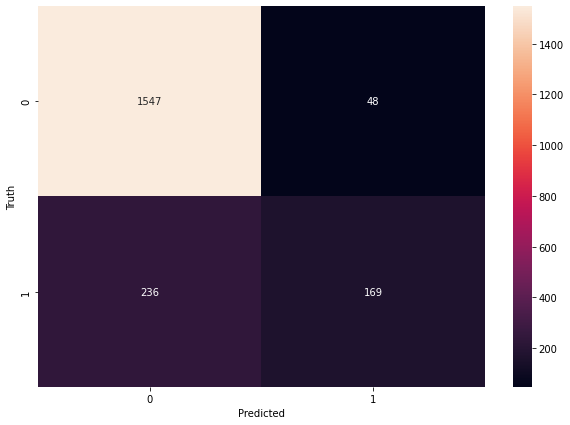

In [32]:
import seaborn as sn 
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [33]:
y_test.shape

(2000,)

In [35]:
# accuracy

round((1547+169)/(1547+169+236+48),2)

0.86

In [36]:
# precision

round(1547/(1547+48),2)

0.97

In [37]:
# precision 1

round(169/(169+236),2)

0.42

In [38]:
# recall 0

round(1547/(1547+236),2)

0.87

In [39]:
# recall 0
round(169/(169+48),2)

0.78

## **dropout method**

In [40]:
model = keras.Sequential([
                          keras.layers.Dense(12, input_shape=(12,), activation='relu'),
                          keras.layers.Dropout(0.5),
                          keras.layers.Dense(10, activation='relu'),
                          keras.layers.Dropout(0.5),
                          keras.layers.Dense(1, activation='sigmoid'),
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train,y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 2s 3ms/step - loss: 0.5969 - accuracy: 0.7193
Epoch 2/100
250/250 [==============================] - 1s 3ms/step - loss: 0.5269 - accuracy: 0.7937
Epoch 3/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5144 - accuracy: 0.7958
Epoch 4/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5071 - accuracy: 0.7962
Epoch 5/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4991 - accuracy: 0.7958
Epoch 6/100
250/250 [==============================] - 1s 3ms/step - loss: 0.4939 - accuracy: 0.7958
Epoch 7/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4863 - accuracy: 0.7955
Epoch 8/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4828 - accuracy: 0.7975
Epoch 9/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4778 - accuracy: 0.7961
Epoch 10/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4780 - accura

In [41]:
model.evaluate(X_test,y_test)

63/63 [==============================] - 0s 2ms/step - loss: 0.3818 - accuracy: 0.8380


[0.38182738423347473, 0.8379999995231628]

In [42]:
yp = model.predict(X_test)
yp[:5]

array([[0.0946767 ],
       [0.08531582],
       [0.1004526 ],
       [0.07870862],
       [0.11177555]], dtype=float32)

In [43]:
y_pred = []
for element in yp:
  if element > 0.5:
    y_pred.append(1)
  else:
    y_pred.append(0)

In [44]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [45]:
y_test[:10]

7054    0
442     0
3954    0
2288    0
3196    0
6178    0
8351    0
5658    1
2065    0
413     1
Name: Exited, dtype: int64

In [46]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1595
           1       0.85      0.24      0.38       405

    accuracy                           0.84      2000
   macro avg       0.84      0.62      0.64      2000
weighted avg       0.84      0.84      0.80      2000

